# Explore here

In [80]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [81]:
#Vizualisamos dataset y nos guardamos solo Latitude, Longitude y MedInc: 
df = pd.read_csv('/workspaces/pauline-K-Medias/data/raw/housing.csv')
df = df[['Latitude', 'Longitude', 'MedInc']]
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [83]:
#Dividimos entre train/test:
X = df
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


Construye un K-Means


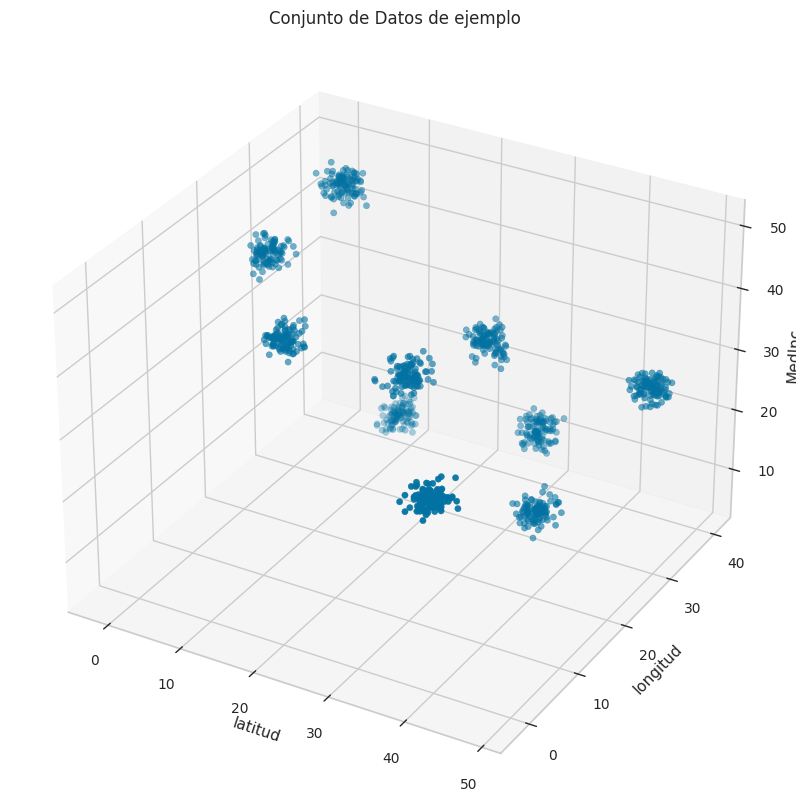

In [84]:
#Generar un conjunto de datos de ejemplo con los datos de entrenamiento
X_train, _ = make_blobs(center_box=(0, 50), n_samples=1000, centers=10, cluster_std=1.2, random_state=10, n_features=3)

#Graficar el conjunto de datos generado, en 3D como hay 3 caracteristicas :
fig = plt.figure(figsize=(12, 10)) 
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2])

# Etiquetas
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')
ax.set_zlabel('MedInc')

plt.title('Conjunto de Datos de ejemplo')
plt.show()

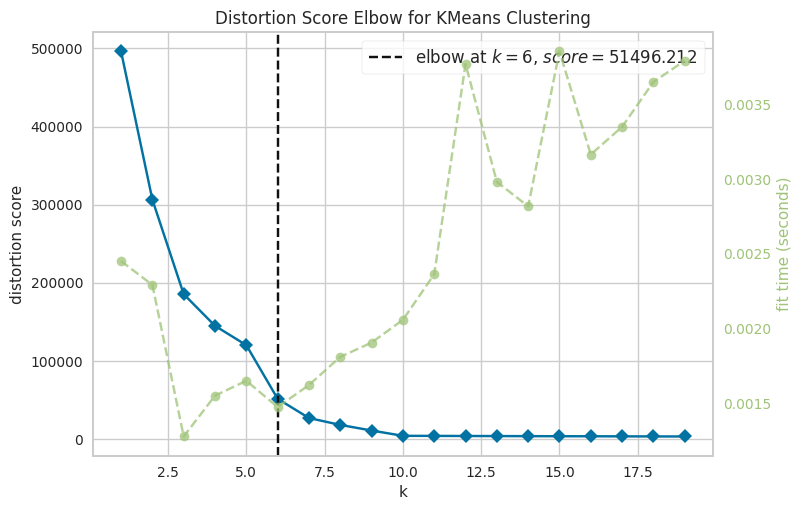

k optimal = 6


In [85]:
#Clase KElbowVisualizer para visualizar el codo (el num de cluster optimal (k))
elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 20))
elbow_vis.fit(X_train)
elbow_vis.show()


Ese gráfico enseña : 
- Inercia  de los errores cuadráticos (variabilidad dentro de cada cluster; es decir, qué tan agrupados están los puntos dentro de cada grupo) en el eje Y 
- vs número de clusters (k) en el eje X

Al inicio : con un valor bajo de k, es decir, pocos clusters, la inercia es alta, ya que el modelo tiene que agrupar muchos puntos en pocos clusters, lo que da lugar a clusters más grandes y menos homogéneos

- Codo = k optimo = **el numero de clusters optimo** = el punto donde la inercia disminuye más lentamente, aquí es 6.

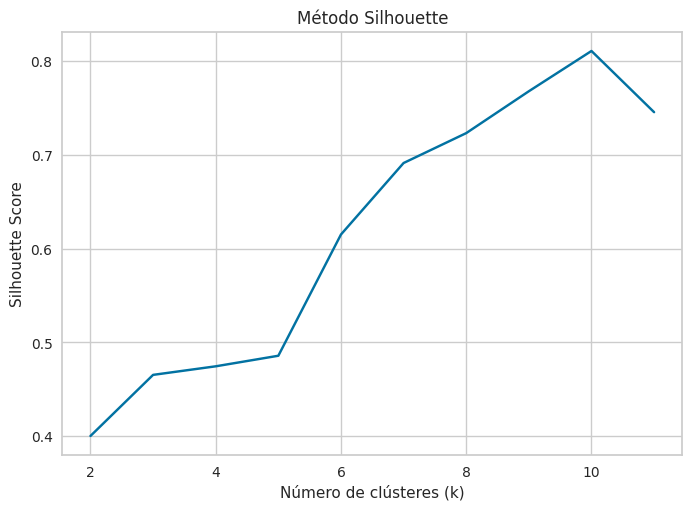

In [87]:
#Definir el rango de número de clústeres para probar (intentamos con 12, el doble del k que nos salió antes)
k_values = range(2, 12)

#Inicializar listas para almacenar los valores de silhouette para cada número de clústeres
silhouette_scores = []

#Probar diferentes valores de k
for k in k_values:
  cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
  silhouette_scores.append(silhouette_score(X_train, cluster_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.show()

Pico alto a k=10, con más de 0,8 (Solhouette score ente -1 y 1)

Son 4 clusters más que el k optimal que obtuvimos en el test anterior, pero también graficamente era donde la linea empezaba a ser plana.

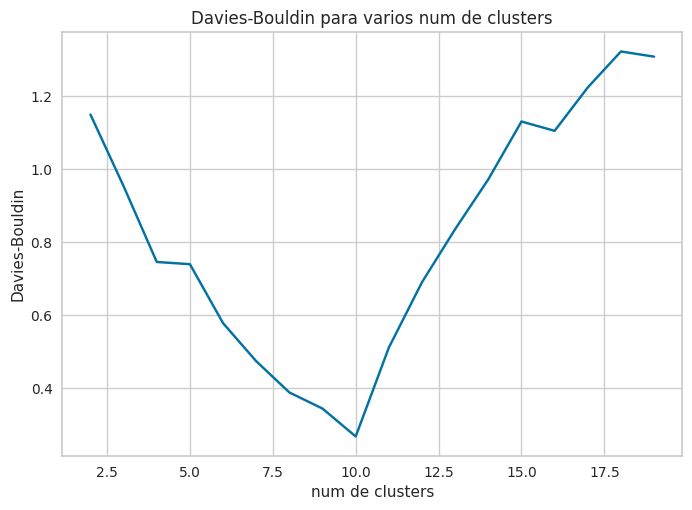

In [88]:
#Sacamos el índice Davies-Bouldin para evaluar la calidad de los clusters
num_clusters = range(2, 20)
db_scores = []

#Probar diferentes valores de k
for k in num_clusters:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_train)
    db_scores.append(davies_bouldin_score(X_train, cluster_labels))

plt.plot(num_clusters, db_scores)
plt.title('Davies-Bouldin para varios num de clusters')
plt.xlabel('num de clusters')
plt.ylabel('Davies-Bouldin')
plt.show()

Igual que con el metodo silhouette, nos sale que la mejor separación entre los clusters es cuando son **10**. 

In [90]:
#Entrenar el modelo entonces con 10 clusters
model = KMeans(n_clusters = 10, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=10, random_state=42)

In [93]:
#Realizar predicciones con datos de test
predictions = model.predict(X_test.values)
print(predictions)

[3 3 3 ... 3 3 3]
